

# Samsung Human Activity Recognition


En esta tarea, veremos cómo funcionan los métodos de reducción de la dimensionalidad de los datos asociados a la resolución de la tarea de clasificación.

Trabajaremos con el conjunto de datos [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Descarga los datos [aquí](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). Los datos provienen de los acelerómetros y giroscopios de los teléfonos móviles Samsung Galaxy S3 (puedes encontrar más información sobre las características utilizando el enlace anterior), también se conoce el tipo de actividad de una persona con el teléfono en el bolsillo - si caminó, estuvo de pie, se acostó, se sentó o subió o bajó las escaleras.

En primer lugar, pretendemos que el tipo de actividad nos es desconocido, y trataremos de agrupar a las personas únicamente en función de las características disponibles. A continuación, resolvemos el problema de determinar el tipo de actividad física como un problema de clasificación.


In [ ]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use(["seaborn-darkgrid"])
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.family"] = "DejaVu Sans"

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

<ipython-input-1-61da01b7891c>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-darkgrid"])


In [ ]:
X_train = np.loadtxt('https://raw.githubusercontent.com/pelayoarbues/the_valley_public_data/master/feature_engineering/samsung_HAR/samsung_train.txt')
y_train = np.loadtxt(
    'https://raw.githubusercontent.com/pelayoarbues/the_valley_public_data/master/feature_engineering/samsung_HAR/samsung_train_labels.txt'
).astype(int)

X_test = np.loadtxt('https://raw.githubusercontent.com/pelayoarbues/the_valley_public_data/master/feature_engineering/samsung_HAR/samsung_test.txt')
y_test = np.loadtxt(
    os.path.join('https://raw.githubusercontent.com/pelayoarbues/the_valley_public_data/master/feature_engineering/samsung_HAR/samsung_test_labels.txt')
).astype(int)

In [ ]:
# Checking dimensions
assert X_train.shape == (7352, 561) and y_train.shape == (7352,)
assert X_test.shape == (2947, 561) and y_test.shape == (2947,)

Define the number of unique values of the labels of the target class.

In [ ]:
print(np.unique(y_train))

[1 2 3 4 5 6]


[las etiquetas corresponden a las siguientes actividades:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 – walking
- 2 – walking upstairs
- 3 – walking downstairs
- 4 – sitting
- 5 – standing
- 6 – laying down

Vamos a resolver el problema de clasificación, dado que los datos están etiquetados.

Para la clasificación, se utiliza la máquina de vectores soporte - clase `sklearn.svm.LinearSVC`. En este curso, no estudiamos este algoritmo por separado, pero es bien conocido y puedes leer sobre él, por ejemplo [aquí](http://cs231n.github.io/linear-classify/#svmvssoftmax).

Elija el hiperparámetro `C` para `LinearSVC` usando `GridSearchCV`.

- Entrena el nuevo `StandardScaler` en el conjunto de entrenamiento (con todas las características originales), aplica el escalado al conjunto de prueba
- En `GridSearchCV`, especifica `cv` = 3.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {"C": [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
%%time
best_svc = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CPU times: user 1min 7s, sys: 1.91 s, total: 1min 9s
Wall time: 1min 8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

In [ ]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9382506099134881)

**Pregunta 1**<br>
Qué valor del hiperparámetro `C` fue seleccionado utilizando Cross-Validation? <br>

**Respuestas:**
- 0.001
- 0.01
- 0.1
- 1
- 10

In [ ]:
y_predicted = best_svc.predict(X_test_scaled)

In [ ]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying,all
walking,494,2,0,0,0,0,496
climbing up the stairs,12,459,0,0,0,0,471
going down the stairs,2,3,414,1,0,0,420
sitting,0,4,0,426,61,0,491
standing,0,0,0,15,517,0,532
laying,0,0,0,0,11,526,537
all,508,468,414,442,589,526,2947


** Pregunta 2: ** <br>
¿Qué tipo de actividad es la peor detectada por SVM en términos de precisión? ¿Recall?

**Opciones de respuesta:**
- precisión - subir las escaleras, recall - tumbarse
- precisión - tumbarse, recall - sentarse
- precisión - caminar, recall - caminar
- precisión - estar de pie, recuerdo - estar sentado


Por último, hacemos lo mismo que en la pregunta 1, pero usando PCA.

- Utilizamos `X_train_scaled` y` X_test_scaled`.
- Entrenamos el mismo PCA que antes, en el conjunto de entrenamiento escalado, aplicamos el escalado al conjunto de test
- Eligemos el hiperparámetro `C` mediante validación cruzada en el conjunto de entrenamiento con transformación PCA. Notarás que ahora funciona mucho más rápido.



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

** Pregunta 3: ** <br>
¿Cuál es el número mínimo de componentes principales necesario para cubrir el 90% de la varianza de los datos originales (escalados)?

**Opciones de Respuesta:**
- 56
- 65
- 63
- 193


In [ ]:
X_train_pca.shape

(7352, 63)

** Pregunta 4: ** <br>

¿Qué porcentaje de la varianza está cubierto por el primer componente principal? Redondea al porcentaje más cercano.

Opciones de respuesta:
- 45
- 51
- 56
- 61

In [ ]:
round(float(pca.explained_variance_ratio_[0] * 100))

7

Visualizamos los datos proyectados en los dos componentes principales.

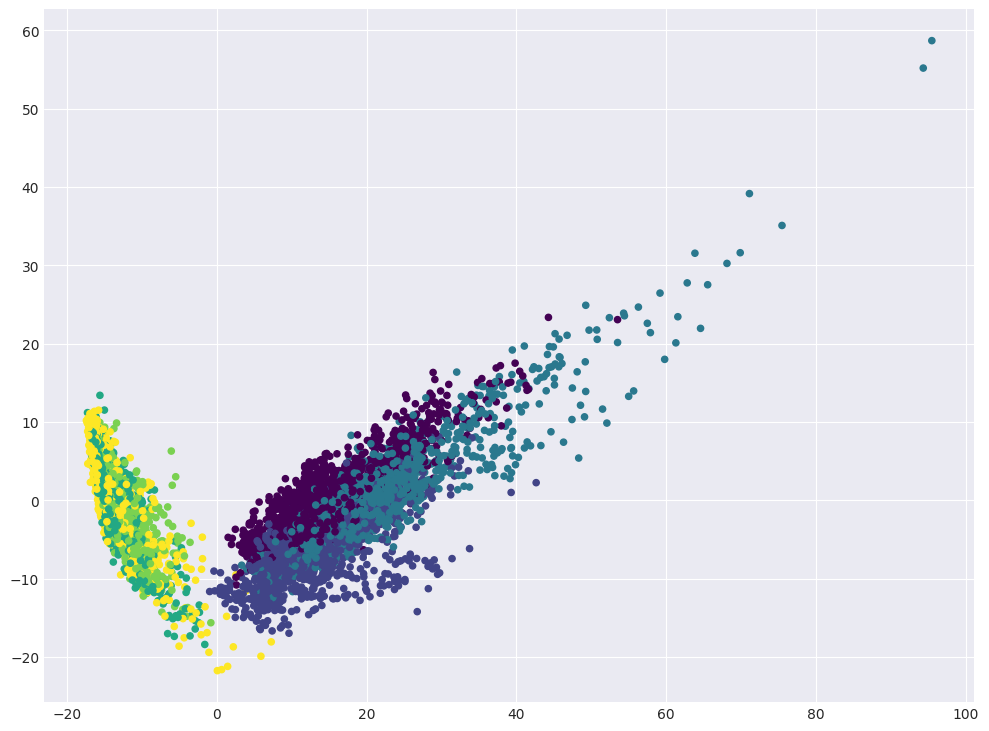

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, cmap='viridis');

In [ ]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [ ]:
%%time
best_svc_pca = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc_pca.fit(X_train_pca, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CPU times: user 15.1 s, sys: 1.32 s, total: 16.4 s
Wall time: 16.8 s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, verbose=1)

Comprobamos otra vez cuál ha sido el parámetro escogido en Cross Validation y qué score obtenemos de accuracy.

In [ ]:
best_svc_pca.best_params_, best_svc_pca.best_score_


({'C': 1}, 0.8998943094169531)

*Pregunta 5* **
¿Cuál es la diferencia entre la mejor calidad (precisión) de la validación cruzada en el caso de las 561 características iniciales y en el segundo caso, cuando se aplicó el método de componentes principales? Redondea al porcentaje más cercano.

** Opciones: **

- la calidad es la misma
- 2%
- 4%
- 10%
- 20%

In [ ]:
round(100 * (best_svc_pca.best_score_ - best_svc.best_score_))


-4

** Pregunta 6: ** <br>
Seleccione todas las afirmaciones correctas:

** Opciones de respuesta: **
- El análisis de componentes principales en este caso permitió reducir el tiempo de entrenamiento del modelo, mientras que la calidad (precisión media de la validación cruzada) se resintió mucho, en más de un 10%
- El PCA puede utilizarse para visualizar los datos, pero hay métodos mejores para esta tarea, por ejemplo, el tSNE. Sin embargo, PCA tiene una menor complejidad computacional
- PCA construye combinaciones lineales de características iniciales, y en algunas aplicaciones podrían ser mal interpretadas por los humanos

Comentario:

1. La primera afirmación es cierta, el análisis de componentes principales en este caso permitió reducir significativamente el tiempo de entrenamiento del modelo, pero la calidad no se resintió tanto - sólo un 4%
2. Para la visualización de datos multidimensionales es mejor utilizar métodos de aprendizaje múltiple, en particular, tSNE. Al mismo tiempo, las métricas que evalúan la calidad de la visualización aún no se han inventado realmente, pero tSNE se utiliza ampliamente precisamente porque en algunos casos construye "buenas" imágenes que muestran la estructura de los datos, como en el ejemplo con MNIST
3. Las combinaciones lineales de características que construyen el PCA son mal interpretadas por los humanos, por ejemplo, 0,574 * salario + 0,234 * num_children